In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt

# Testing the Fair Coin Hypothesis

In this example, we'll test the hypothesis that a given coin is fair, meaning that it has a 50% probability to land on either side when flipped.

Let's assume that we are performing an experiment in which we toss a coin 100 times, for which we would expect ON AVERAGE 50 heads and 50 tails.  We know this because the expectation value for the number of heads (for example) is $$E[n] = \sum_0^N n\;f(n;N,p) = Np$$ where $N$ is the number of trials and $p$ is the probability of success.  However, we also know that the variance of the distribution of expected outcomes is: $$V[n] = E[n^2] -(E[n])^2 = N p (1-p)$$, which takes the value of $100(0.5)(0.5)=25$ for $N=100$ and $p=0.5$.  That means that 68.3% of all outcomes for this test should lie within $45 < n < 55$.

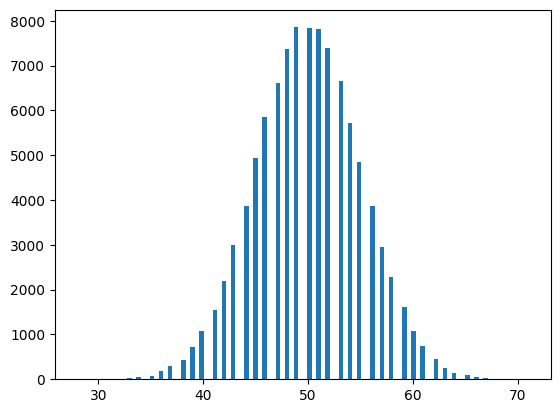

In [2]:
# Let's make a set of 100 coin flip experiments with a fair coin
# We'll repeat the expreiment 100k times so we can see the distribution
outcomes = np.random.binomial(100,0.5,100000)

plt.hist(outcomes,100)
plt.show()

### Let's turn this into a hypothesis test

Assume that you were handed a coin and were asked to determine if it was fair or not.  You immediately cut the coin directly down the middle and weigh each piece of the coin to the microgram, expecting each side to be equal in mass.  Staring at the small pile of metal filings left on the ground from the cutting process, you become aware that you don't know if an equal amount came from each side of the coin.  You're now left with two half-coins and a pile of metal dust, and you realize that you've failed the assignment.  

In a parallel universe, doppleganger you had taken a course on statistical methods and you know that the better choice would be to build a hypothesis test.  Knowing that you cannot determine the coin is air to 100% certainty, you ask the owner of the coin how certain they'd like your answer to be.  They answer 95% certain that it's fair and add that they'd like to know the largest degree of unfairness the coin could possess and still be determined to be fair with a probability of 5%.

The obvious answer: a hypothesis test!  You've learned all the details you need to know about the test:

1-- The size of the test (aka, significance level or Type-1 Error rate or false exclusion rate) is 5%.  Because you know the formula for the binomial probability distribution: $$ f(n ; N,p) = {N! \over n! (N-n)!} p^n (1-p)^{N-n}$$ you can simply sum probabilities above n=X until you find the integral to be 5%.  This is the number of heads in 100 tosses beyond at which you would conclude that the coin is unfair.

2-- You need to find the largest unfair heads probability ($p_H^\prime$) that would give a test power of 95% (ie, the Type-2 error rate is 5%).  To do so, you now need to solve for the value $p_H^\prime$ that yields an integral below N=X that is equal to 5%.  This is the largest unfair heads probability that could be accepted by your hypothesis test.

In [3]:
## Let's solve for the largest number of heads we would accept as fair
## This is an arbitrary number, depending on how you set the size of the test.
## Let's do this via the brute force and awkwardness approach, in which we'll simply calculate probabilities

def binomial(n,N,p):
    combo = math.factorial(N) / (math.factorial(n)*math.factorial(N-n))
    power1 = np.power(p,n)
    power2 = np.power(1-p,N-n)
    return combo*power1*power2

totalProb = 0
maxN = 0
size = 0.05
for i in range(101):
    totalProb += binomial(100-i,100,0.50)
    print("i: ",100-i, ", prob: ",binomial(100-i,100,0.50), ", totProb: ",totalProb)
    maxN = 100-i
    if totalProb >= size:
        break



i:  100 , prob:  7.888609052210118e-31 , totProb:  7.888609052210118e-31
i:  99 , prob:  7.888609052210118e-29 , totProb:  7.967495142732219e-29
i:  98 , prob:  3.9048614808440084e-27 , totProb:  3.9845364322713306e-27
i:  97 , prob:  1.275588083742376e-25 , totProb:  1.3154334480650894e-25
i:  96 , prob:  3.093301103075262e-24 , totProb:  3.224844447881771e-24
i:  95 , prob:  5.939138117904503e-23 , totProb:  6.26162256269268e-23
i:  94 , prob:  9.403635353348797e-22 , totProb:  1.0029797609618065e-21
i:  93 , prob:  1.2627738903068384e-20 , totProb:  1.363071866403019e-20
i:  92 , prob:  1.4679746474816996e-19 , totProb:  1.6042818341220015e-19
i:  91 , prob:  1.5005963063146263e-18 , totProb:  1.6610244897268264e-18
i:  90 , prob:  1.3655426387463099e-17 , totProb:  1.5316450877189926e-17
i:  89 , prob:  1.1172621589742536e-16 , totProb:  1.2704266677461528e-16
i:  88 , prob:  8.286361012392381e-16 , totProb:  9.556787680138533e-16
i:  87 , prob:  5.609228993004073e-15 , totProb:  6

### We couldn't find exactly 5%

This is clearly because the binomial PDF is discrete.  So we have to choose either a test size of 4.43% or 6.66%.  The spirit of the question requires 95%, which is not satisfied by $n=58$ for which the test size would be 93.34%.  So we will use n=59, meaning that if we find more than $n=59$ heads in a sample of 100 coin tosses, we will reject the hypothesis that the coin is fair and accept the alternative hypothesis that it is unfair.

In [11]:
## Now let's find the value of p-prime that gives at most a 5% chance of being accepted as fair.


maxN = 0
size = 0.05
precision = 10000 # we'll know the answer to 1 part in this number
maxProb = 1
doPrint = False
for p in range(precision):
    maxProb = 0.50+1.0*p/precision
    totalProb = 0
    for i in range(59+1):
        totalProb += binomial(i,100,maxProb)
    if doPrint:
        print("prob: ",maxProb, " , totalProb: ",totalProb)
    if totalProb <= size:
        break

print("max probability = ",maxProb)

max probability =  0.6731


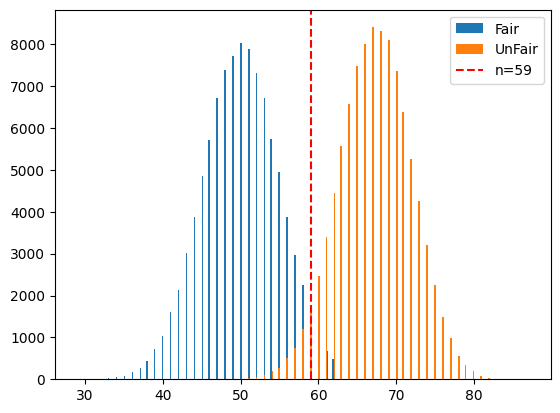

In [18]:
outcomesFair = np.random.binomial(100,0.5,100000)
outcomesUnFair = np.random.binomial(100,maxProb,100000)

plt.hist(outcomesFair,200,label="Fair")
plt.hist(outcomesUnFair,200,label="UnFair")
plt.axvline(x=59, color='r', linestyle='dashed', linewidth=1.5,label="n=59")
plt.legend()
plt.show()